<a href="https://colab.research.google.com/github/Meepat/Birria-Tacos-/blob/main/birria_tacos_Philly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MEET PATEL**
*YELP - Philly Taco Project!!* 

In [ ]:
# Yelp Documentation: https://www.yelp.com/developers/documentation/v3/business_search

In [ ]:
# importing Libraries
import pandas as pd
import numpy as np
import requests as r
from itertools import product

In [ ]:
# Connections: URL, API KEY
url = 'https://api.yelp.com/v3/businesses/search'

#obtain your Unique key form yelp
key = '-'
headers = {
    'Authorization': 'Bearer %s' % key
}

**Scrape One: Test Location**

In [ ]:
# Defining Parameters: Location, Limit, Term, Radius
parameters = { 
    'location': 'Center City, Philadelphia, PA',
    'limit': 3,
    'term': 'Birria Tacos',
    'radius': 30000
}

# Response variable to Json file
response = r.get(url, headers=headers, params=parameters)
data = response.json()
data

{'businesses': [{'alias': 'la-mula-terca-philadelphia',
   'categories': [{'alias': 'mexican', 'title': 'Mexican'},
    {'alias': 'cafes', 'title': 'Cafes'},
    {'alias': 'soup', 'title': 'Soup'}],
   'coordinates': {'latitude': 39.9260864257812,
    'longitude': -75.182014465332},
   'display_phone': '(267) 761-5194',
   'distance': 3515.355370154855,
   'id': 'b1okJ5qEPCIHbIgQ1NGyXQ',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Z2OXeHDIj8xzNuahfn5WHg/o.jpg',
   'is_closed': False,
   'location': {'address1': '2053 S Beechwood St',
    'address2': None,
    'address3': None,
    'city': 'Philadelphia',
    'country': 'US',
    'display_address': ['2053 S Beechwood St', 'Philadelphia, PA 19145'],
    'state': 'PA',
    'zip_code': '19145'},
   'name': 'La Mula Terca',
   'phone': '+12677615194',
   'price': '$$',
   'rating': 4.5,
   'review_count': 100,
   'transactions': ['pickup'],
   'url': 'https://www.yelp.com/biz/la-mula-terca-philadelphia?adjust_creative=68lXhynOt

**Scrape Two: Multiple Locations**

In [ ]:
# 2 addresses 
addresses = ['Center City, Philadelphia, PA','Fishtown, Philadelphia, PA']
offset = np.arange(0,500,50)

# list of tuples between addresses and offset 
tuples = list(product(addresses,offset))

#Display tuples
tuples[15]

('Fishtown, Philadelphia, PA', 250)

In [ ]:
#List
listings = []

# Future DF Columns
cols = ['Name', 'Reviews', 'Rating', 'Address', 'Phone']

#Loop 
for address, step in tuples: 
  search_parameters = {
      'location': address,
      'term': 'Birria Tacos',
      'radius': 40000,
      'limit': 50,
      'offset': step}

  resp = r.get(url, headers=headers, params=search_parameters)
  raw_data = resp.json()

  for business in raw_data['businesses']:
    name = business['name']
    reviews = business['review_count']
    rating = business['rating']
    location = business['location']['display_address'][0]
    phone = business['display_phone']
    listings.append([name, reviews, rating, location, phone])
  df = pd.DataFrame.from_records(listings, index='Name', columns= cols)
print(f'Total Records: {len(df)}')
df.head()


Total Records: 239


,Reviews,Rating,Address,Phone
Name,,,,
La Mula Terca,100,4.5,2053 S Beechwood St,(267) 761-5194
Mi Pueblito Tacos,33,4.5,"Philadelphia, PA 19147",(267) 444-4361
Taqueria Morales,64,4.5,1429 Jackson St,(215) 645-9392
Mexican Grill Stand,8,4.5,1736 N 13th St,
La Chingonita,4,4.5,"Philadelphia, PA 19125",(484) 452-3344


In [ ]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, Taco City to Tinas Tacos
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  239 non-null    int64  
 1   Rating   239 non-null    float64
 2   Address  239 non-null    object 
 3   Phone    239 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 9.3+ KB


None

,Reviews,Rating
count,239.000000,239.000000
mean,123.958159,4.094142
std,176.678571,0.565581
min,1.000000,2.000000
25%,16.000000,3.500000
50%,57.000000,4.000000
75%,158.000000,4.500000
max,1103.000000,5.000000


In [ ]:
df

,Reviews,Rating,Address,Phone
Name,,,,
La Mula Terca,100,4.5,2053 S Beechwood St,(267) 761-5194
Mi Pueblito Tacos,33,4.5,"Philadelphia, PA 19147",(267) 444-4361
Taqueria Morales,64,4.5,1429 Jackson St,(215) 645-9392
Mexican Grill Stand,8,4.5,1736 N 13th St,
La Chingonita,4,4.5,"Philadelphia, PA 19125",(484) 452-3344
...,...,...,...,...
Rio Dulce Mexican Market,4,4.5,713 W Main St,(215) 647-2946
Tortilla Press Cantina,153,3.5,7716 Maple Ave,(856) 356-2050
Rosa Mexicano,16,3.0,105 Coulter Ave,(610) 673-0870


In [ ]:
# Most Reviews and Ratings
df = df.sort_values(by='Reviews', ascending=False)
display(df.head())

df = df.sort_values(by='Rating', ascending=False)
display(df.head())

,Reviews,Rating,Address,Phone
Name,,,,
Distrito,1103,3.5,3945 Chestnut St,(215) 222-1657
Distrito,1103,3.5,3945 Chestnut St,(215) 222-1657
Cantina Los Caballitos,894,3.5,1651 E Passyunk Ave,(215) 755-3550
Cantina Los Caballitos,894,3.5,1651 E Passyunk Ave,(215) 755-3550
Tequilas Restaurant,773,4.0,1602 Locust St,(215) 546-0181


,Reviews,Rating,Address,Phone
Name,,,,
Taco City,1,5.0,1600 S Christopher Columbus Blvd,(610) 726-0068
Sabor Puebla Taqueria & Cafe,6,5.0,1715 Mount Ephraim Ave,(856) 379-4698
El Gordo Bros,11,5.0,310 E Main St,(610) 454-9516
Canela Mexican Cafe,3,5.0,2442 NJ-38,(856) 382-7474
Frida's Mexican Taqueria,12,5.0,133 N Main St,(267) 203-8091


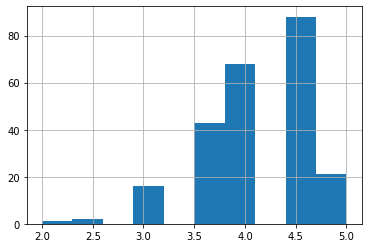

In [ ]:
df['Rating'].hist()

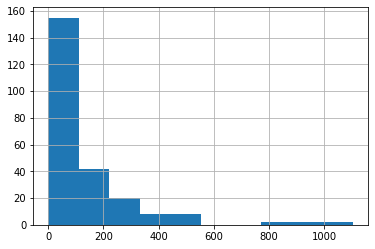

In [ ]:
df['Reviews'].hist()